# 随机分布在高维球壳上的分布

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate high-dimensional data
d = 1000  # Dimension
n_samples = 10000  # Number of samples
data = np.random.randn(n_samples, d)  # Standard normal distribution

# Calculate the norm of each point
norms = np.linalg.norm(data, axis=1)

# Compute mean and standard deviation of the norms
mean_norm = np.mean(norms)
std_norm = np.std(norms)
print(f"Mean of norms: {mean_norm:.2f}, Standard deviation: {std_norm:.2f}")

# Plot the distribution of norms
plt.hist(norms, bins=50, density=True, alpha=0.7, color='blue', label='Norm distribution')
plt.axvline(mean_norm, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_norm:.2f}, Std:{std_norm:.2f}')
plt.axvline(mean_norm + std_norm, color='green', linestyle='--', linewidth=1.5, label=f'Mean + Std: {mean_norm + std_norm:.2f}')
plt.axvline(mean_norm - std_norm, color='green', linestyle='--', linewidth=1.5, label=f'Mean - Std: {mean_norm - std_norm:.2f}')

plt.title(f"Average Distribution (Dimension={d})")
plt.xlabel("Norm")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# 展示聚类算法的思路

/home/yixiong_ren/anaconda3/envs/normal/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


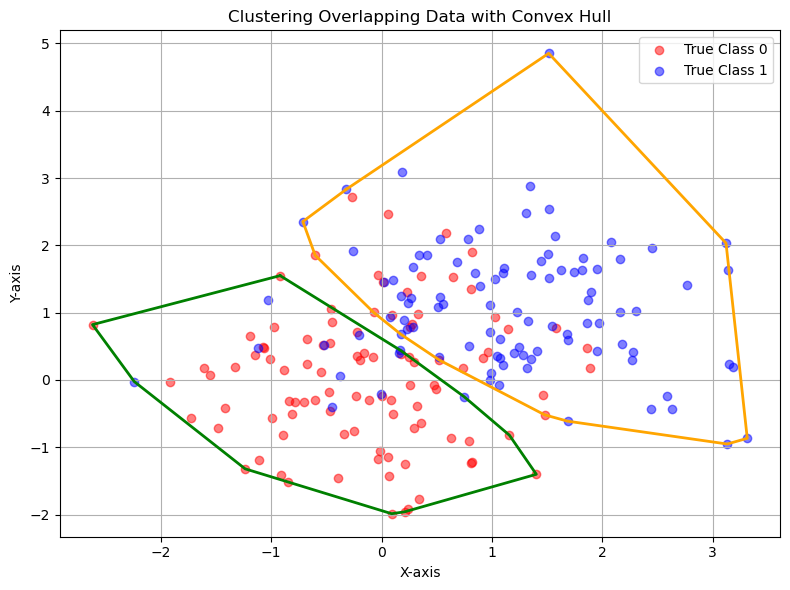

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull

np.random.seed(42)

# 1. 数据生成(有标签)
# 第一类数据，以(0,0)为中心，高斯分布
class0 = np.random.randn(100, 2) * 1.0 + np.array([0, 0])
labels0 = np.zeros(100, dtype=int)

# 第二类数据，以(1,1)为中心，高斯分布，并与第一类有一定重叠
class1 = np.random.randn(100, 2) * 1.0 + np.array([1, 1])
labels1 = np.ones(100, dtype=int)

X = np.vstack((class0, class1))
true_labels = np.hstack((labels0, labels1))

# 2. 使用 KMeans 聚类（不使用true_labels，仅使用X）
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# 将数据分为两个簇
cluster0_points = X[cluster_labels == 0]
cluster1_points = X[cluster_labels == 1]

# 3. 可视化
fig, ax = plt.subplots(figsize=(8, 6))

# （a）根据原始标签绘制数据点，用不同颜色区分真实类别
# 原始类0用浅绿色，原始类1用浅橙色，以显示真实数据分布
ax.scatter(X[true_labels==0,0], X[true_labels==0,1], c='red', alpha=0.5, label='True Class 0')
ax.scatter(X[true_labels==1,0], X[true_labels==1,1], c='blue', alpha=0.5, label='True Class 1')

# （b）绘制聚类结果的点（为了突出聚类结果，可以用边框或更深的颜色）
#ax.scatter(cluster0_points[:,0], cluster0_points[:,1], edgecolors='green', facecolors='none', label='Cluster 0')
#ax.scatter(cluster1_points[:,0], cluster1_points[:,1], edgecolors='orange', facecolors='none', label='Cluster 1')

# 计算凸包并绘制，用于展示聚类簇的边界
def plot_convex_hull(points, ax, color):
    if len(points) < 3:
        # 不足3点无法构成凸包
        return
    hull = ConvexHull(points)
    hull_points = points[hull.vertices]
    # 闭合多边形
    hull_points = np.concatenate([hull_points, hull_points[:1]], axis=0)
    ax.plot(hull_points[:,0], hull_points[:,1], color=color, linewidth=2)

plot_convex_hull(cluster0_points, ax, 'green')
plot_convex_hull(cluster1_points, ax, 'orange')

ax.set_title('Clustering Overlapping Data with Convex Hull')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


# 画出距离矩阵

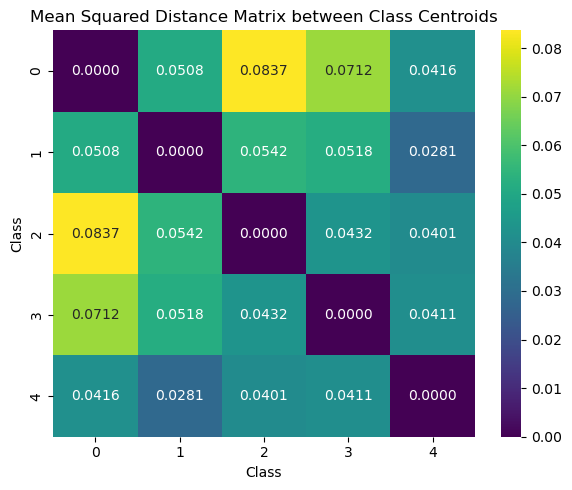

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 deal_test_features 是形状为 (N, D) 的numpy数组
# 假设 deal_test_labels 是形状为 (N,) 的numpy数组
# 以下仅为示例数据，请使用自己的数据进行替换
# deal_test_features = np.random.randn(200, 10)
# deal_test_labels = np.random.randint(0, 5, size=200)

unique_labels = np.unique(deal_test_labels)
mean_points = []

# 1. 根据标签分组并求出每一类的均值点
for lbl in unique_labels:
    class_points = deal_test_features[deal_test_labels == lbl]
    mean_point = np.mean(class_points, axis=0)
    mean_points.append(mean_point)

mean_points = np.vstack(mean_points)  # (C, D)

# 2. 计算均方距离矩阵
C = len(unique_labels)
dist_matrix = np.zeros((C, C))
for i in range(C):
    for j in range(C):
        diff = mean_points[i] - mean_points[j]
        # 求各维度差的平方，并取均值
        dist_matrix[i, j] = np.mean(diff**2)

# 3. 绘制热力图
plt.figure(figsize=(6, 5))
ax = sns.heatmap(dist_matrix, annot=True, fmt=".4f", cmap='viridis', 
                 xticklabels=unique_labels, yticklabels=unique_labels)

ax.set_title("Mean Squared Distance Matrix between Class Centroids")
ax.set_xlabel("Class")
ax.set_ylabel("Class")

plt.tight_layout()
plt.show()


# 得到每一类对于其均值的范数以及分布

Class 0: mean = 2.8648, std = 0.8044
Class 1: mean = 3.1641, std = 0.6630
Class 2: mean = 2.9333, std = 0.6917
Class 3: mean = 2.9810, std = 0.6772
Class 4: mean = 3.0021, std = 0.7667


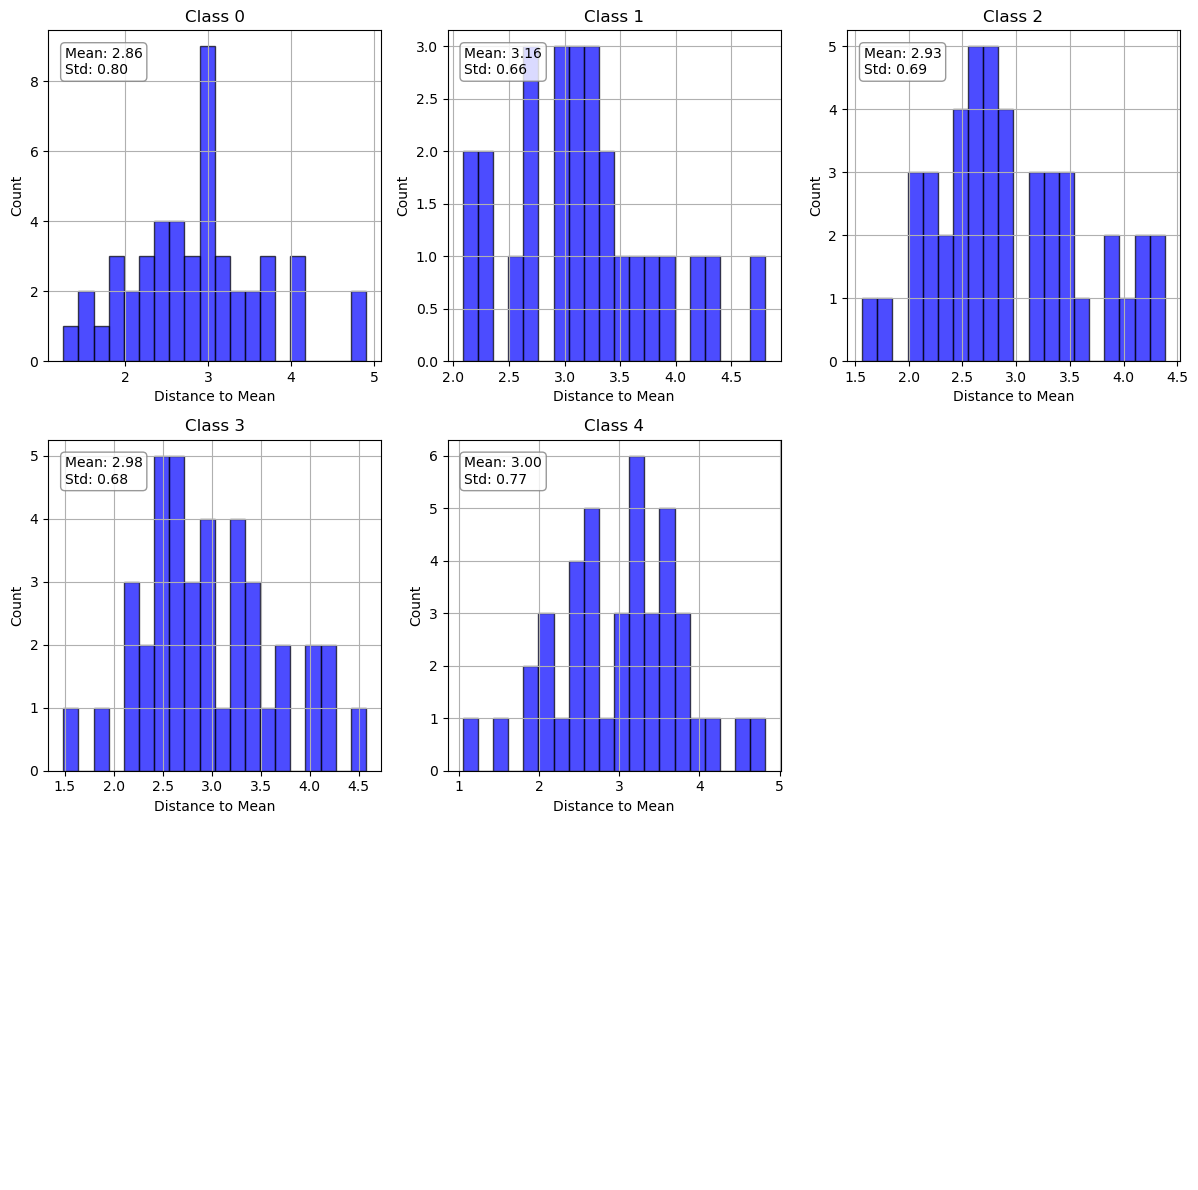

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 假设 deal_test_features: shape (N, D)
# 假设 deal_test_labels: shape (N,)
# 这里用随机数据作为示例，请替换为你的实际数据
# deal_test_features = np.random.randn(200, 10)
# deal_test_labels = np.random.randint(0, 5, size=200)

unique_labels = np.unique(deal_test_labels)
num_classes = len(unique_labels)

class_distances = {}
class_std = {}
class_mean = {}

for lbl in unique_labels:
    class_points = deal_test_features[deal_test_labels == lbl]
    mean_point = np.mean(class_points, axis=0)
    dists = np.linalg.norm(class_points - mean_point, axis=1)
    class_distances[lbl] = dists
    class_std[lbl] = np.std(dists)
    class_mean[lbl] = np.mean(dists)

for lbl in unique_labels:
    print(f"Class {lbl}: mean = {class_mean[lbl]:.4f}, std = {class_std[lbl]:.4f}")

# 计算n，使子图尽可能接近方阵排列
n = math.ceil(math.sqrt(num_classes))

fig, axes = plt.subplots(n, n, figsize=(4*n, 4*n))
axes = axes.flatten()  # 将子图矩阵展平为一维列表，便于迭代

# 绘制子图
for idx, lbl in enumerate(unique_labels):
    ax = axes[idx]
    dist_data = class_distances[lbl]
    ax.hist(dist_data, bins=20, alpha=0.7, color='blue', edgecolor='black')
    ax.set_title(f"Class {lbl}")
    ax.set_xlabel("Distance to Mean")
    ax.set_ylabel("Count")
    ax.grid(True)
    # 标注均值与标准差
    mean_val = class_mean[lbl]
    std_val = class_std[lbl]
    ax.text(0.05, 0.95, f"Mean: {mean_val:.2f}\nStd: {std_val:.2f}", 
            transform=ax.transAxes, verticalalignment='top', fontsize=10, 
            bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.8))

# 对于多余的子图（如果类数量不是正好n*n），隐藏它们
for idx in range(num_classes, n*n):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()
